<a href="https://colab.research.google.com/github/Vaelastraszz/Reinforcement_Learning/blob/master/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# <h2> Installation des packages necessaires </h2>

In [0]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!pip install gym

In [0]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.2 [783 kB]
Fetched 783 kB in 1s (1,012 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.2_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.2) ...
Setting up xvfb (2:1.19.6-1ubuntu4.2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [0]:
!pip install "gym[atari]"

In [0]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (702 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 130919 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...


<h2> Reinforcement Learning sur CartPole Classic </h2>

<h3> Paramétrage de l'affichage </h3>

In [0]:
import gym
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython import display as ipythondisplay

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

<h3> Initialisation du jeu et test des différentes variables renvoyées </h3>

In [0]:
env = gym.make("CartPole-v0")

In [0]:
obs = env.reset()

In [0]:
env.action_space

Discrete(2)

In [0]:
img = env.render(mode='rgb_array')

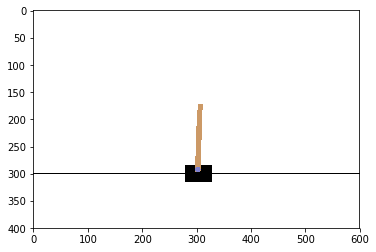

In [0]:
plt.imshow(img)

Affichage de l'image du jeu à son initialisation 

In [0]:
obs

array([0.02066418, 0.03876933, 0.03610043, 0.02716326])

<h3> Création d'une policy basique en test </h3> 

In [0]:
def basic_policy(obs):
    
    angle = obs[2]
    
    return 0 if angle < 0 else 1

In [0]:
totals = []

for episode in range(500):
    
    episode_rewards = 0
    obs = env.reset()

    for step in range(1000):

        action = basic_policy(obs)
        obs,reward,done,info = env.step(action)
        episode_rewards += reward

        if done:
            break
            
    if episode < 20:
        print("Score de la partie {} est de: {}".format(episode,episode_rewards))
    totals.append(episode_rewards)        

Score de la partie 0 est de: 38.0
Score de la partie 1 est de: 50.0
Score de la partie 2 est de: 40.0
Score de la partie 3 est de: 52.0
Score de la partie 4 est de: 37.0
Score de la partie 5 est de: 38.0
Score de la partie 6 est de: 46.0
Score de la partie 7 est de: 40.0
Score de la partie 8 est de: 47.0
Score de la partie 9 est de: 47.0
Score de la partie 10 est de: 47.0
Score de la partie 11 est de: 26.0
Score de la partie 12 est de: 61.0
Score de la partie 13 est de: 31.0
Score de la partie 14 est de: 51.0
Score de la partie 15 est de: 41.0
Score de la partie 16 est de: 52.0
Score de la partie 17 est de: 41.0
Score de la partie 18 est de: 50.0
Score de la partie 19 est de: 56.0


In [0]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.27, 8.439259446183652, 24.0, 68.0)

<h3> Gestion de l'affichage </h3> 

In [0]:
def plot_environment(env, figsize=(5,4)):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [0]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

In [0]:
img= env.render(mode="rgb_array")

In [0]:
frames = []
obs = env.reset()

for step in range(1000):
    
    img= env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)
    obs,reward,done,info = env.step(action)
    episode_rewards += reward

    if done:
        break
 

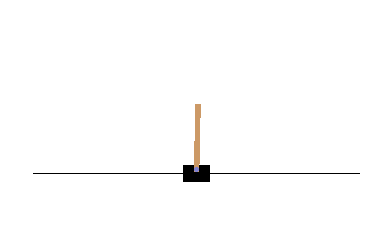

In [0]:
import matplotlib.animation as animation
%matplotlib inline

plt.close()
fig = plt.figure()
patch = plt.imshow(frames[0])
plt.axis('off')
    
cart_anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=False, interval=20)    
plt.show()

cart_anim.save('/content/gdrive/My Drive/cart.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [0]:
from IPython.display import HTML

HTML(cart_anim.to_html5_video())

<h3> Initialisation du modèle avec Tensorflow </h3>

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
import keras.backend as K

In [0]:
def custom_loss(y_true, y_pred, clip_delta=1.0):
        
    error = y_true - y_pred
    cond  = K.abs(error) <= clip_delta

    squared_loss = 0.5 * K.square(error)
    quadratic_loss = 0.5 * K.square(clip_delta) + clip_delta * (K.abs(error) - clip_delta)

    return K.mean(tf.where(cond, squared_loss, quadratic_loss))

In [0]:
model.compile(loss='mse',
               optimizer=optimizers.Adam(lr=0.001))

<h3> Création de la policy basée sur l'équation d'optimalité de Bellman (Markov Chains) </h3> 




In [0]:
random_act_decay = 0.99
import random

In [0]:
def add(old_obs, action, reward, new_obs, list_data):
    return list_data.append([old_obs, action, reward, new_obs])

In [0]:
# See our trained bot in action
def get_training(model, num_tests):
    
    scores = []
    dim = len(env.reset())
    random_action_probability = 1
    list_data=[]
    batch_size = 32
    frames=[]
    
    for num_test in range(num_tests):
       
        observation = env.reset()
        reward_sum = 0
        
        for step in range(1000):

            if num_test == 9:
                img= env.render(mode="rgb_array")
                frames.append(img) 
            
            
            random_action_probability *= random_act_decay
            random_action_probability = max(random_action_probability, 0.1)
              
            state = np.reshape(observation, [1,dim])
            
            if np.random.random() < random_action_probability:
            
                action = env.action_space.sample()
                
            else:
                
                action = np.argmax(model.predict(state)[0])
           
            observation, reward, done,info= env.step(action)
            reward_sum += reward
           
            add(state, action, reward, observation, list_data)
            
            if done:

                reward = -200
                add(state, action, reward, None, list_data)
                                
                break
               
        
        if len(list_data) > batch_size:
                
            batch = random.sample(list_data, batch_size)
            update_batch(batch,model)
        
        
        scores.append(reward_sum)
        
        if num_test < 20 :
            print("Score à la partie {} est de : {}".format(num_test,reward_sum))
             
        
        
    env.close()
    
    return scores,frames

In [0]:
def update_batch(batch_data, model):
    
    random.shuffle(batch_data)
    dim = len(env.reset())
    
    batch_targ = np.empty(0).reshape(0,2)
    batch_obs = np.empty(0).reshape(0,dim)
    
    for sample_data in batch_data:
        
        old_obs, action, reward, new_obs = sample_data
        
        old_obs = np.reshape(old_obs, [1,4])
        targets = np.reshape(model.predict(old_obs)[0],2)
        targets[action] = reward
        
        if new_obs is not None:
            new_obs = np.reshape(new_obs, [1,4])
            predictions = model.predict(new_obs)
            new_action = np.argmax(predictions)
            targets[action] += 0.95 * predictions[0, new_action]

            
        batch_obs = np.vstack([batch_obs,np.reshape(old_obs, [-1, 4])])
        batch_targ = np.vstack([batch_targ,np.reshape(targets, [-1, 2])])    
    
    model.train_on_batch(batch_obs, batch_targ)
    

In [0]:
scores,frames=get_training(model, 1000)

Score à la partie 0 est de : 14.0
Score à la partie 1 est de : 132.0
Score à la partie 2 est de : 196.0
Score à la partie 3 est de : 200.0
Score à la partie 4 est de : 200.0
Score à la partie 5 est de : 200.0
Score à la partie 6 est de : 200.0
Score à la partie 7 est de : 200.0
Score à la partie 8 est de : 200.0
Score à la partie 9 est de : 200.0
Score à la partie 10 est de : 200.0
Score à la partie 11 est de : 200.0
Score à la partie 12 est de : 200.0
Score à la partie 13 est de : 200.0
Score à la partie 14 est de : 200.0
Score à la partie 15 est de : 200.0
Score à la partie 16 est de : 200.0
Score à la partie 17 est de : 200.0
Score à la partie 18 est de : 200.0
Score à la partie 19 est de : 200.0


In [0]:
max(scores)

200.0

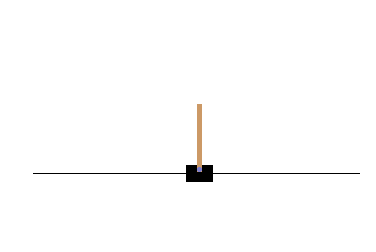

In [0]:
import matplotlib.animation as animation
%matplotlib inline

plt.close()
fig = plt.figure()
patch = plt.imshow(frames[0])
plt.axis('off')
    
cart_anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=False, interval=20)    
plt.show()

cart_anim.save('/content/gdrive/My Drive/cart.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [0]:
from IPython.display import HTML

HTML(cart_anim.to_html5_video())

<h1> Reinforcement sur Pong Atari Game </h1>

<h3> Initialisation de l'environnement </h3> 

In [0]:
import random

In [0]:
env = gym.make("Pong-v0")

In [0]:
observation = env.reset()

In [0]:
observation.shape

(210, 160, 3)

In [0]:
img = env.render(mode='rgb_array')

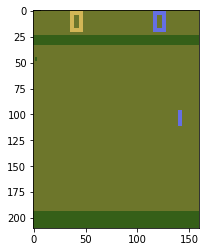

In [0]:
plt.imshow(img)

In [0]:
env.action_space

Discrete(6)

<h3> Observation du jeu en actions aléatoires </h3>

In [0]:
frames = []
STEPS = 500
episode_rewards = 0
UP_ACTION = 2
DOWN_ACTION = 3

for i in range(STEPS):
    # choose random action
    action = random.randint(UP_ACTION, DOWN_ACTION)

    #run one step
    observation, reward, done, info = env.step(action)
    frames.append(observation) # collecting observation
    episode_rewards += reward
    print(reward)
    # if episode is over, reset to beginning
    if done:
        observation = env.reset()
        frames.append(observation)

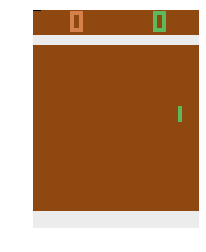

In [0]:
import matplotlib.animation as animation
%matplotlib inline

plt.close()
fig = plt.figure()
patch = plt.imshow(frames[0])
plt.axis('off')
   
pong_anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=False, interval=20)    
plt.show()

pong_anim.save('/content/gdrive/My Drive/pong.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [0]:
from IPython.display import HTML

HTML(pong_anim.to_html5_video())

<h3> Preprocessing des frames du jeu </h3>

In [0]:
def prepro(I):
  #prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector 
    I = I[35:195] # crop
    I = I[::2,::2,0] # downsample by factor of 2
    I[I == 144] = 0 # erase background (background type 1)
    I[I == 109] = 0 # erase background (background type 2)
    I[I != 0] = 1 # everything else (paddles, ball) just set to 1
  
    return I.astype(np.float).ravel()

Fonction permettant de réduire la taille de l'image en vecteur 80x80 noir et blanc

In [0]:
input_dimensions = 80*80

In [0]:
def difference_game(prev_obs, cur_obs):   
    return prepro(cur_obs) - prepro(prev_obs) if prev_obs is not None else np.zeros(input_dimensions)

Création d'une fonction pour comparer les deux frames pour savoir le mouvement des barres et de la balle

<h3> Création du modèle </h3>

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(200, input_dim=input_dimensions, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras import optimizers

In [0]:
model.compile(loss='binary_crossentropy',
               optimizer=optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1280200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 1,280,401
Trainable params: 1,280,401
Non-trainable params: 0
_________________________________________________________________


<h3> Création de la policy pour gagner des parties de pong </h3>

In [0]:
UP_ACTION = 2
DOWN_ACTION = 3
random_act_decay = 0.99
import random

In [0]:
def discount_reward(rewards, gamma):
    
    discounted_rewards = np.empty(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * gamma
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

In [0]:
def dis_norm_rewards(all_rewards, gamma):
    
    all_dis_rewards = [discount_reward(rewards, gamma) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_dis_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
       
    return [(discount_r - reward_mean)/reward_std for discount_r in all_dis_rewards]

In [0]:
from sklearn.utils import shuffle

In [0]:
def train_pong(model,num_episodes):
    
    dim = 80*80
    
    for episodes in range(num_episodes):
        
        observation = env.reset()
        x_train, y_train, rewards,list_reward = [],[],[],[]
        reward_sum = 0
        prev_obs = None
        frames = []
        
        for steps in range(15000):
            
            
            cur_obs = observation
            
            x = difference_game(prev_obs,cur_obs)
            
            prev_obs = cur_obs
            
            x = x.reshape(1,-1)
                    
            proba = model.predict(x)[0][0]    
                
            action = UP_ACTION if proba > np.random.uniform() else DOWN_ACTION
            
            y = 1 if action == UP_ACTION else 0
            
            observation, reward, done, info = env.step(action)
            
            frames.append(observation)
            rewards.append(reward)
            
            reward_sum +=reward
          
            x_train.append(x)
            y_train.append(y)
            
            if done :
                list_reward.append(rewards)
                if episodes % 100 == 0:
                    print('At the end of episode', episodes, 'the score is :', reward_sum)
                    
                    
                #model.train_on_batch(np.vstack(x_train),np.vstack(y_train),sample_weight=dis_norm_rewards(list_reward,0.95)[0])
                x_t,y_t,z = shuffle(np.vstack(x_train), np.vstack(y_train), dis_norm_rewards(list_reward,0.95)[0])
                model.train_on_batch(x_t,y_t,sample_weight=z)
                                
                if episodes %1000 == 0:
                    model.save('/content/gdrive/My Drive/RL/game.h5')
                
                break
   
                    
        if reward_sum > 8:
            print("Partie remportée à l'épisode :",episodes,"the score is :",reward_sum)
            model.save('/content/gdrive/My Drive/RL/win_game.h5')
            break 
            
    return frames

In [0]:
from keras import callbacks

In [0]:
from keras.models import load_model

loaded_model = load_model('/content/gdrive/My Drive/RL/game.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
frames = train_pong(model,30000)

At the end of episode 0 the score is : -21.0
At the end of episode 100 the score is : -20.0
At the end of episode 200 the score is : -20.0
At the end of episode 300 the score is : -21.0
At the end of episode 400 the score is : -21.0
At the end of episode 500 the score is : -20.0
At the end of episode 600 the score is : -19.0
At the end of episode 700 the score is : -15.0
At the end of episode 800 the score is : -18.0
At the end of episode 900 the score is : -17.0
At the end of episode 1000 the score is : -15.0
At the end of episode 1100 the score is : -13.0
At the end of episode 1200 the score is : -15.0
At the end of episode 1300 the score is : -18.0
At the end of episode 1400 the score is : -17.0
At the end of episode 1500 the score is : -12.0
At the end of episode 1600 the score is : -17.0
At the end of episode 1700 the score is : -16.0
At the end of episode 1800 the score is : -16.0
At the end of episode 1900 the score is : -6.0
At the end of episode 2000 the score is : -11.0
At th

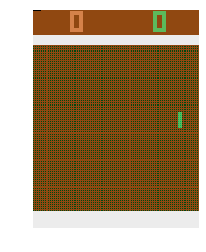

In [0]:
import matplotlib.animation as animation
%matplotlib inline

plt.close()
fig = plt.figure()
patch = plt.imshow(frames[0])
plt.axis('off')
   
pong_win = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=False, interval=20)    
plt.show()

pong_win.save('/content/gdrive/My Drive/pong2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [0]:
from IPython.display import HTML

HTML(pong_win.to_html5_video())

In [0]:
frames = train_pong(loaded_model,30000)

At the end of episode 0 the score is : -11.0
At the end of episode 100 the score is : -6.0
At the end of episode 200 the score is : -2.0
At the end of episode 300 the score is : -11.0
Partie remportée à l'épisode : 395 the score is : 14.0
